In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.17.0


### Preparing Dataset for training

In [4]:
img_size = 50
batch_size = 128
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(r"H:\KANISHK\projects_null_class\1\train",target_size = (img_size,img_size),
                                                                     color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory(r"H:\KANISHK\projects_null_class\1\test",target_size = (img_size,img_size),
                                                                     color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [7]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [8]:
model = model_fer((50,50,1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 50, 50, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 50, 50, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 50, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 25, 25, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [15]:
import os
import pickle
from tensorflow.keras.callbacks import Callback

# Custom PickleModelCheckpoint callback
class PickleModelCheckpoint(Callback):
    def __init__(self, filepath, monitor='val_accuracy', verbose=1, mode='max'):
        super(PickleModelCheckpoint, self).__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.verbose = verbose
        self.best = -float('inf') if mode == 'max' else float('inf')
        self.mode = mode
    
    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is None:
            return
        
        # Save model if current metric is better
        if (self.mode == 'max' and current > self.best) or (self.mode == 'min' and current < self.best):
            if self.verbose:
                print(f"\nEpoch {epoch + 1}: {self.monitor} improved from {self.best} to {current}, saving model to {self.filepath}")
            self.best = current

            # Ensure valid path to avoid FileNotFoundError
            os.makedirs(os.path.dirname(self.filepath), exist_ok=True)

            with open(self.filepath, 'wb') as f:
                pickle.dump(self.model.get_weights(), f)
        else:
            if self.verbose:
                print(f"\nEpoch {epoch + 1}: {self.monitor} did not improve from {self.best}")


# Define the full valid path to save the weights
save_path = os.path.join(r'H:\KANISHK\projects_null_class\1\models', 'model_weights.pkl')

# Create the custom checkpoint callback with a full path
checkpoint = PickleModelCheckpoint(filepath=save_path, monitor='val_accuracy', verbose=1, mode='max')
callbacks = [checkpoint]

# Training configuration
epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size * 2
validation_steps = validation_generator.n // validation_generator.batch_size * 2

# Train the model
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)


Epoch 1/5
225/448 ━━━━━━━━━━━━━━━━━━━━ 1:55 518ms/step - accuracy: 0.5353 - loss: 1.2208
Epoch 1: val_accuracy improved from -inf to 0.5239620804786682, saving model to H:\KANISHK\projects_null_class\1\models\model_weights.pkl
448/448 ━━━━━━━━━━━━━━━━━━━━ 128s 283ms/step - accuracy: 0.5383 - loss: 1.2189 - val_accuracy: 0.5240 - val_loss: 1.2424
Epoch 2/5
225/448 ━━━━━━━━━━━━━━━━━━━━ 1:47 482ms/step - accuracy: 0.5649 - loss: 1.1575
Epoch 2: val_accuracy improved from 0.5239620804786682 to 0.5521036386489868, saving model to H:\KANISHK\projects_null_class\1\models\model_weights.pkl
448/448 ━━━━━━━━━━━━━━━━━━━━ 116s 256ms/step - accuracy: 0.5636 - loss: 1.1602 - val_accuracy: 0.5521 - val_loss: 1.1972
Epoch 3/5
225/448 ━━━━━━━━━━━━━━━━━━━━ 1:33 418ms/step - accuracy: 0.5832 - loss: 1.1143
Epoch 3: val_accuracy improved from 0.5521036386489868 to 0.5550292730331421, saving model to H:\KANISHK\projects_null_class\1\models\model_weights.pkl
448/448 ━━━━━━━━━━━━━━━━━━━━ 101s 223ms/step - ac

In [16]:
model.evaluate(validation_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.4831 - loss: 1.3734


[1.361844539642334, 0.48969072103500366]

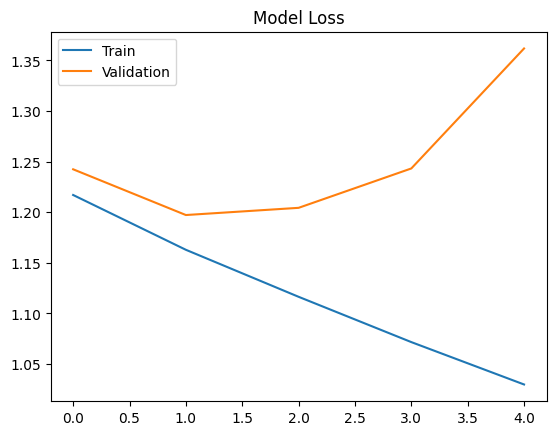

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

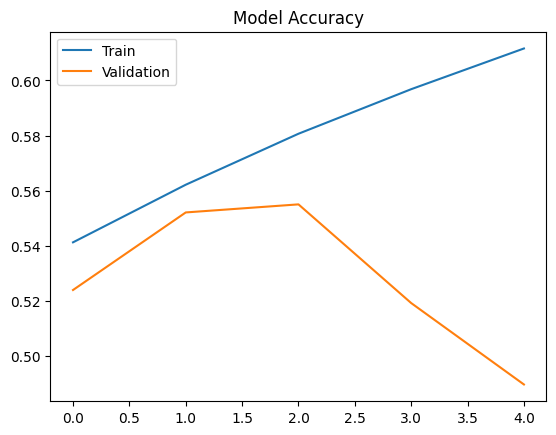

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

In [21]:
import os

# Ensure valid path for saving model JSON file
save_dir = r"H:\KANISHK\projects_null_class\1"  # Adjust the path as needed
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

# Define the full path for the JSON file
model_json_path = os.path.join(save_dir, "model_k29.json")

# Save the model architecture as a JSON file
model_json = model.to_json()
with open(model_json_path, "w") as json_file:
    json_file.write(model_json)

print(f"Model architecture saved as JSON at {model_json_path}")


Model architecture saved as JSON at H:\KANISHK\projects_null_class\1\model_k29.json
